#### Importing all the required Libraries

In [292]:
# Importing  Warnings
import warnings
warnings.filterwarnings('ignore')

#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Loading the data:

In [293]:
# Loading the Data
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Data Cleaning

In [294]:
# Converting exports,imports and health spending percentages to normal values.

data['exports'] = data['exports']*data['gdpp']/100

data['imports'] = data['imports']*data['gdpp']/100

data['health'] = data['health']*data['gdpp']/100

In [295]:
data.shape

(167, 10)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [297]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

 Infrences- We can observe that are no null values in the data 

In [298]:
# checking Duplicates 

data.duplicated(subset = ['country'], keep = False).sum()

0

 Infrences- We can observe that are no duplicate values in the data 

In [299]:
data1=data.drop(['country'],axis=1)
data1.head()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [300]:
data1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


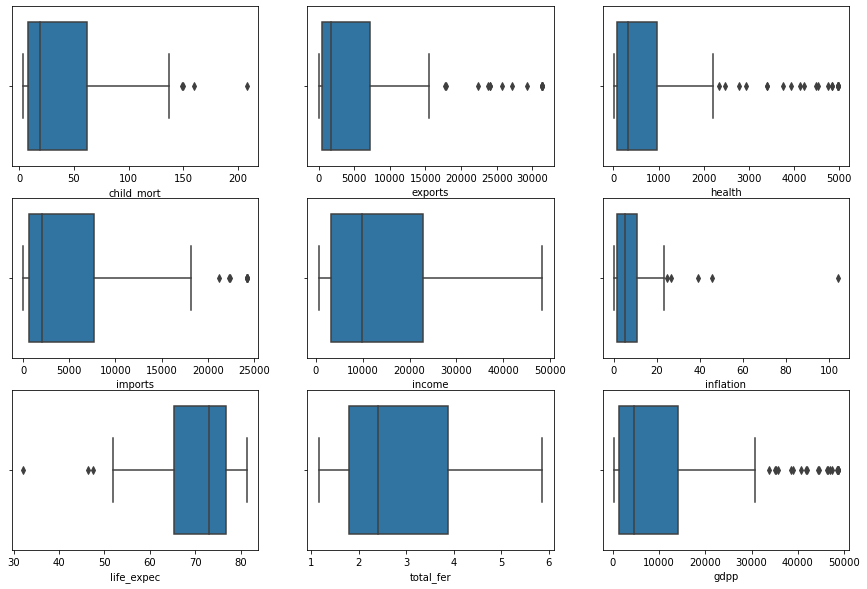

In [341]:
# boxplot  for all the columns to check Outleirs 

plt.figure(figsize = (15,10))
for i in enumerate(data1):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = data.drop(['country'],axis=1))

 Infrences- We can observe from the above boxplots that there are outliers present in almost all the columns. However, We will be  carefully selecting the columns and using the soft-Capping technique to capp the outliers using the lower range and upper range capping method.

In [302]:
##  Dealing with upper ranger outliers for these particular  columns

f = [ 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp']
for i in f:
    q1 = data1[i].quantile(0.05)
    q4 = data1[i].quantile(0.95)
    
    data[i][data1[i]>=q4] = q4

 Infrences- The reason we treated the upper range outliers and not the lower range outliers because we are here finsing the countries in  need of aid.  So basicall the lower range outliers are the countries countries in need of Aid in this scenario

In [303]:
## Dealing with lower ranger outliers for these particular two columns

g = ['child_mort', 'inflation']
for i in g:
    q1 = data1[i].quantile(0.05)
    q4 = data1[i].quantile(0.95)
    
    data[i][data1[i]<=q1] = q1
    

Infrences- The reason we treated the lower range outliers and not the upper range outliers because we are here finsing the countries in  need of aid.  So basicall the upper range outliers are the countries in need of Aid in this scenario with high child motlaity rate and high inflation rate. 

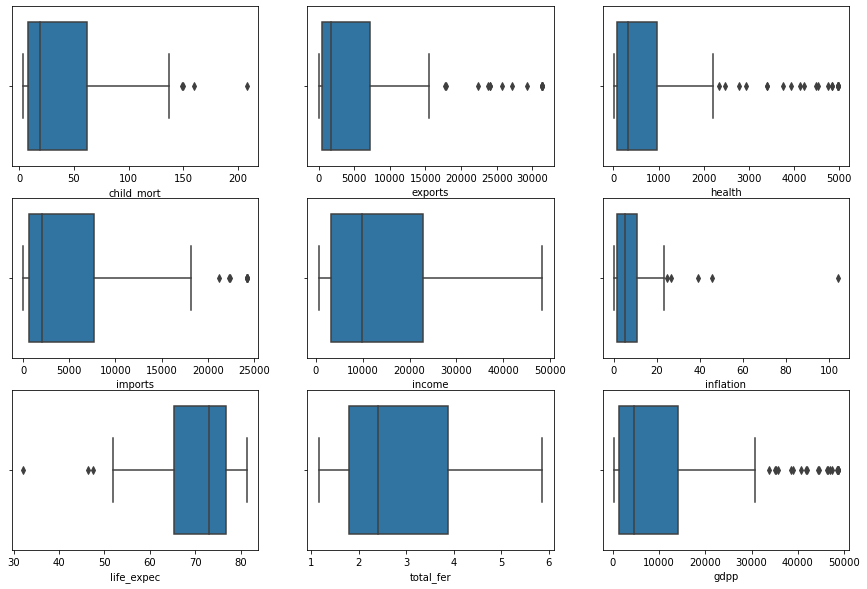

In [304]:
# boxplot  for all the columns to check Outleirs 

plt.figure(figsize = (15,10))
for i in enumerate(data1):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = data.drop(['country'],axis=1))

Insights- We can now observe that most of the outliers are dealth with. There are still some outliers which can be seen in the boxplot , however we will be ignoring them as its important for the data analysis

## HOPSKINS CHECK

In [305]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [306]:
hopkins(data.drop(['country'],axis=1))

0.9284122191851386

Insights- We know that anything over 0.80 is a good number for clustering and in this case we have got 0.92 which is a good signal for us. And we can hereby conclude that this is a good dataset for clustering 

## SCALING 

In [307]:
### Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data2 = ss.fit_transform(data.drop(['country'],axis=1))

In [308]:
data2 = pd.DataFrame(data2)
data2.columns = data1.columns
data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291607,-0.669581,-0.629435,-0.732729,-0.958349,0.150169,-1.623180,2.016421,-0.757362
1,-0.539812,-0.542172,-0.473489,-0.472182,-0.394006,-0.322868,0.654823,-0.880535,-0.523321
2,-0.273560,-0.475838,-0.530017,-0.560152,-0.192552,0.786618,0.677490,-0.019090,-0.498838
3,2.008250,-0.418960,-0.588935,-0.543087,-0.667360,1.388664,-1.181180,2.044904,-0.560376
4,-0.696578,-0.027134,-0.150685,0.306422,0.227992,-0.614335,0.711490,-0.547072,0.013312


Insights- We can observe that the data has been scaled

In [309]:
# Checking the Silhouette Curve to find the optimal value of K

for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(data2)
    print(k, silhouette_score(data2, kmean.labels_))

2 0.49324690885562156
3 0.4338040373671887
4 0.40583530299735276
5 0.4115400139044441
6 0.3239325457555699
7 0.30340685569944864
8 0.2936835289744176
9 0.30982492425823915
10 0.3123385536110308


In [310]:
# Plot the Silhouette Curve to check the optimal value of K
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k, random_state = 0).fit(data2)
    sil.append([k, silhouette_score(data2, kmean.labels_)])

In [311]:
sil = pd.DataFrame(sil)

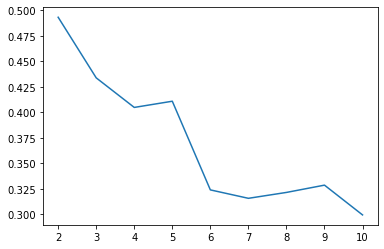

In [342]:
plt.plot(sil[0], sil[1])
plt.show()

In [313]:
## Check the Elbow curve to choose the value of K
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(data2)
    ssd.append([k, kmean.inertia_])

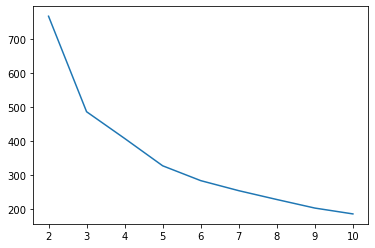

In [343]:
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

Insights- We can observe from both the silhoutte curve and the elbow curve that 3 would be the best value for K and we will be going ahead and implement it

In [315]:
## Final KMeans with K==3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(data2)

KMeans(n_clusters=3, random_state=0)

In [316]:
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [317]:
# Assign the label column back to the original DF

data['label'] = kmean.labels_

In [318]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


In [319]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
label         0
dtype: int64

In [320]:
## Cluster Profiling
# The number of rows that are the part of each cluster

data.label.value_counts()

0    82
1    48
2    37
Name: label, dtype: int64

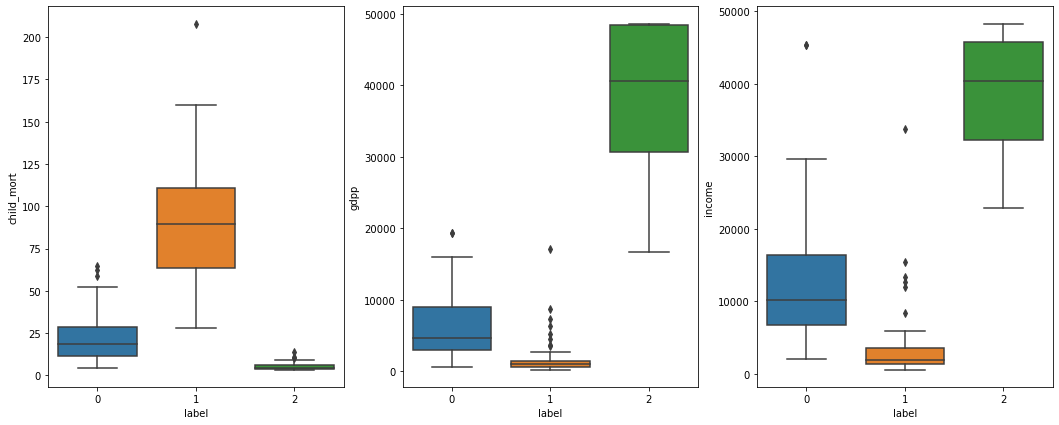

In [321]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='child_mort', data=data)
plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='gdpp', data=data,)
plt.subplot(1, 3, 3)
sns.boxplot(x='label', y='income', data=data)

plt.show()

Insights- We can observe from this boxplot that cluster with label 1 has got the countries with the highest child motality rate. Also Label 1 has got the least GDPP and least income. Therefore, label 1 seems to have the countries really struggling at the minute

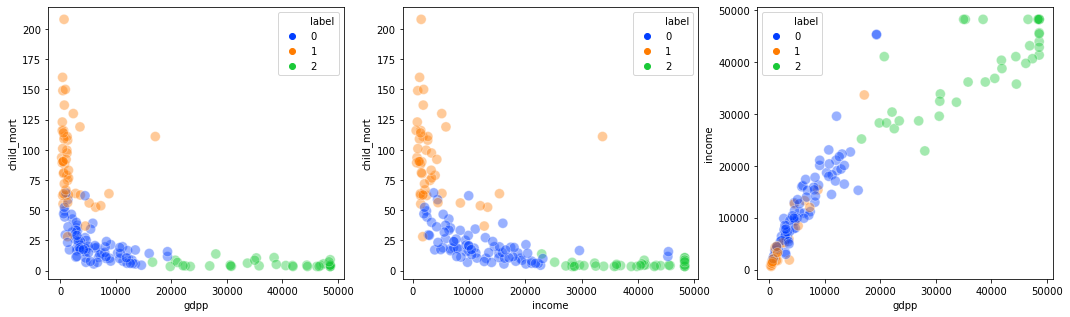

In [322]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='label',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='label',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='label',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

Infrence- From the above scatter plot we can obsrve that countries with low gdpp, low income, hight child motality rate is forming cluster 1 in orange colour and is in far left side of the charts. These will be countries we will be focusing on to decise which country should be given financial aid.

In [323]:
# Checking the CLuster means:
data.groupby(['label']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.886021,1909.208333
0,21.951220,2789.162177,393.062322,2900.485623,12304.756098,7.773754,72.937805,2.289390,6287.463415
2,5.344324,18780.372973,3285.879162,15698.857838,38711.081081,2.834373,79.805405,1.755676,37745.675676


In [324]:
# Countries with label = 1

final_cluster = data[data['label'] == 1]
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]


In [325]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231
88,Liberia,89.3,700.0,327
37,"Congo, Dem. Rep.",116.0,609.0,334
112,Niger,123.0,814.0,348
132,Sierra Leone,160.0,1220.0,399
93,Madagascar,62.2,1390.0,413
106,Mozambique,101.0,918.0,419
31,Central African Republic,149.0,888.0,446
94,Malawi,90.5,1030.0,459
50,Eritrea,55.2,1420.0,482


These are the top 10 countries which are currently struggling the most in terms of low gdpp, low income and high child mortality. These countries should be prioritized and given all the financial and medial aid. 

## Hierarchical Clustering

In [326]:
## scaled data

data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291607,-0.669581,-0.629435,-0.732729,-0.958349,0.150169,-1.623180,2.016421,-0.757362
1,-0.539812,-0.542172,-0.473489,-0.472182,-0.394006,-0.322868,0.654823,-0.880535,-0.523321
2,-0.273560,-0.475838,-0.530017,-0.560152,-0.192552,0.786618,0.677490,-0.019090,-0.498838
3,2.008250,-0.418960,-0.588935,-0.543087,-0.667360,1.388664,-1.181180,2.044904,-0.560376
4,-0.696578,-0.027134,-0.150685,0.306422,0.227992,-0.614335,0.711490,-0.547072,0.013312


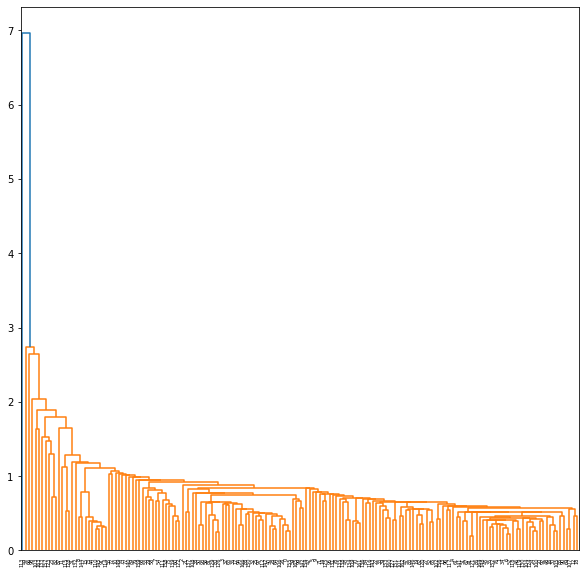

In [327]:
# single linkage
plt.figure(figsize = (10,10))
mergings = linkage(data2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

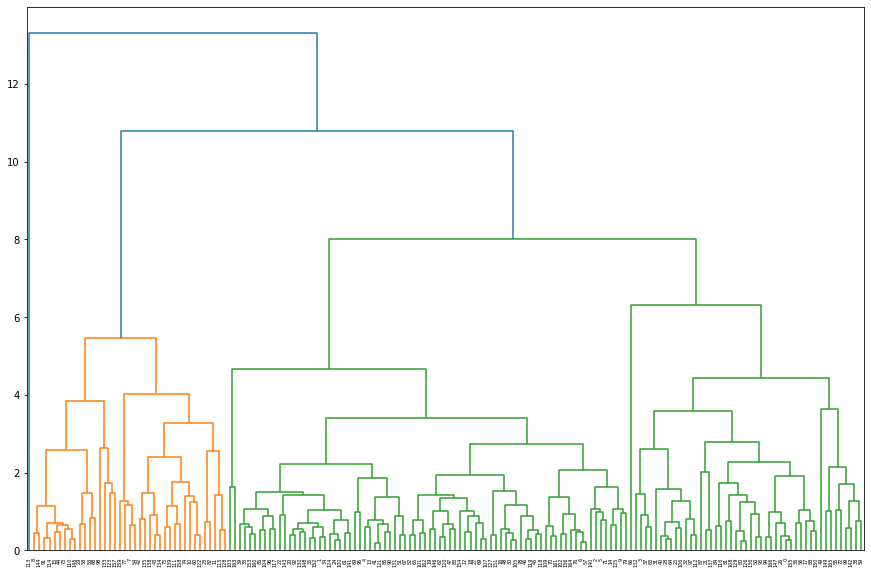

In [348]:
# complete linkage

plt.figure(figsize = (15,10))
mergings = linkage(data2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [329]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [330]:
# assign cluster labels
data['cluster_labels'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,1


In [331]:
data.cluster_labels.value_counts()

1    80
0    47
2    39
3     1
Name: cluster_labels, dtype: int64

In [332]:
data.groupby(['cluster_labels']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
cluster_labels,,,,,,,,,,
3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,1.000000
0,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.865723,1900.255319,1.000000
1,22.157500,2580.729982,385.856630,2793.990264,11478.625000,7.558098,72.871250,2.273375,5962.150000,0.000000
2,5.772821,18387.864103,3152.310487,15260.983077,39051.538462,3.530046,79.589744,1.815897,36799.743590,1.897436


infrence- We will be ignoring cluster 3 as it has just one country in it and its coming on the top because of the high child mortality rate, however they have got a far better gdpp and incopme as compared to the countries in cluster 0. For our analysis, we will be going ahead with countries in 
cluster 0  in this case.

In [333]:
# Countries in Cluster_label = 0

f_cluster = data[data['cluster_labels'] == 0]
f_cluster = f_cluster[['country', 'child_mort', 'income', 'gdpp']]


In [334]:
f_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231
88,Liberia,89.3,700.0,327
37,"Congo, Dem. Rep.",116.0,609.0,334
112,Niger,123.0,814.0,348
132,Sierra Leone,160.0,1220.0,399
93,Madagascar,62.2,1390.0,413
106,Mozambique,101.0,918.0,419
31,Central African Republic,149.0,888.0,446
94,Malawi,90.5,1030.0,459
50,Eritrea,55.2,1420.0,482


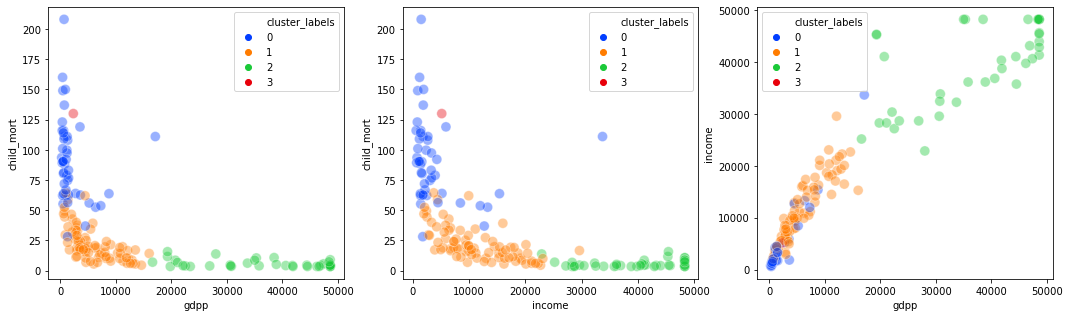

In [336]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',
                data=data, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

Infrence- From the above scatter plot we can obsrve that countries with low gdpp, low income, hight child motality rate is forming cluster 0 in orange colour and is in far left side of the charts. These will be countries we will be focusing on to decise which country should be given financial aid.

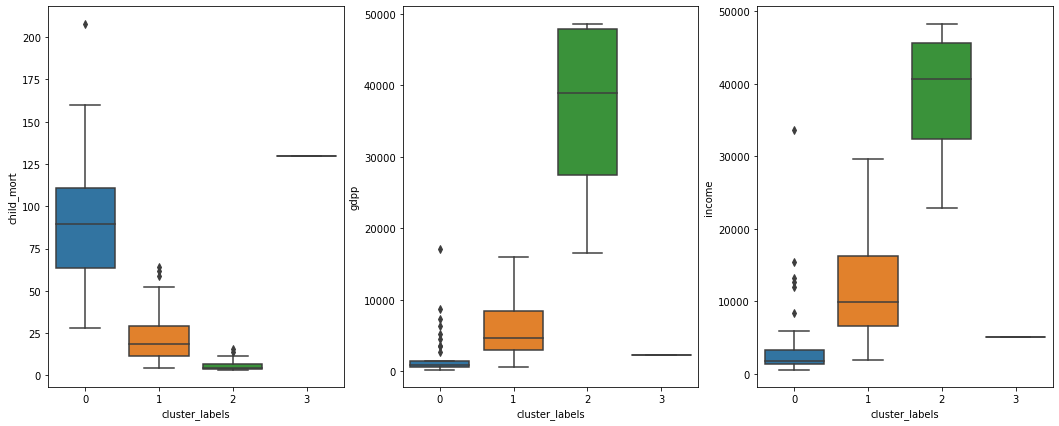

In [337]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='child_mort', data=data)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='gdpp', data=data,)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='income', data=data)

plt.show()

Insights- We can observe from this boxplot that cluster with label 0 has got the countries with the highest child motality rate. Also Label 0 has got the least GDPP and least income. Therefore, label 0 seems to have the countries really struggling at the minute

In [338]:
# Top 10  countries in need of aid using Heeirchal clustering 
f_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231
88,Liberia,89.3,700.0,327
37,"Congo, Dem. Rep.",116.0,609.0,334
112,Niger,123.0,814.0,348
132,Sierra Leone,160.0,1220.0,399
93,Madagascar,62.2,1390.0,413
106,Mozambique,101.0,918.0,419
31,Central African Republic,149.0,888.0,446
94,Malawi,90.5,1030.0,459
50,Eritrea,55.2,1420.0,482


In [339]:
# Top 10  countries in need of aid using kmeans clustering 

final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231
88,Liberia,89.3,700.0,327
37,"Congo, Dem. Rep.",116.0,609.0,334
112,Niger,123.0,814.0,348
132,Sierra Leone,160.0,1220.0,399
93,Madagascar,62.2,1390.0,413
106,Mozambique,101.0,918.0,419
31,Central African Republic,149.0,888.0,446
94,Malawi,90.5,1030.0,459
50,Eritrea,55.2,1420.0,482


## Coclusion

We can observe that we got the same sets of countries using kmeans and Hierarchical clustering method.